Dataset loaded successfully!
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Accuracy: 0.8810085520495429

Classification Report:
               precision    

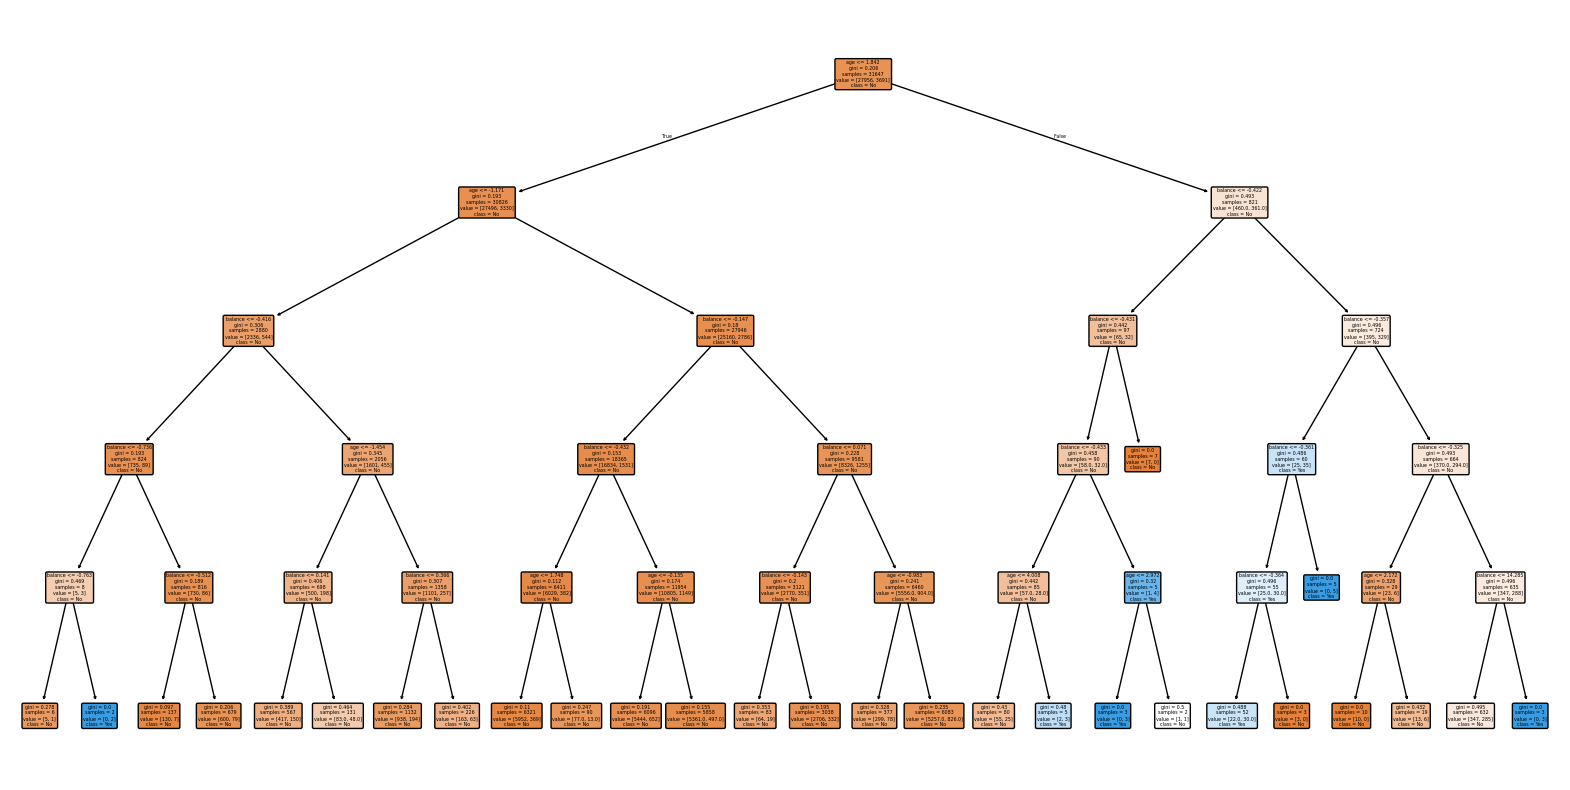

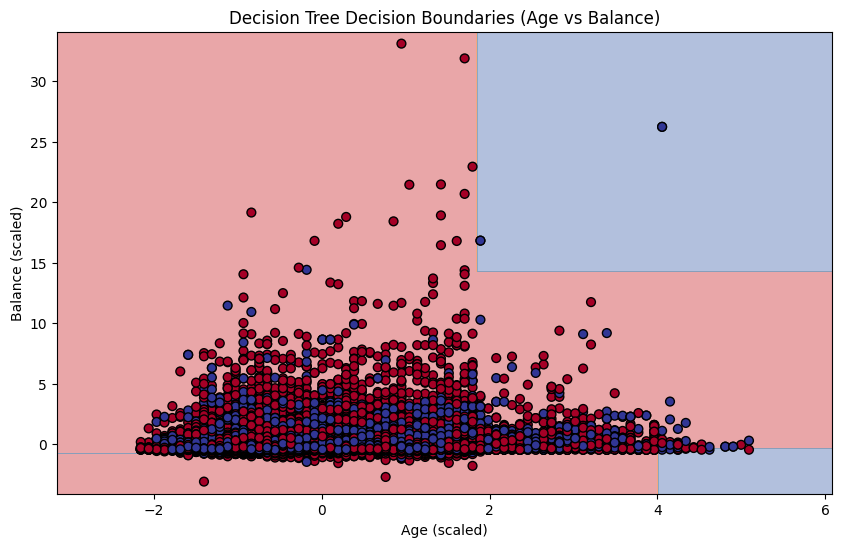

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import requests, zipfile, io

# -------------------------------
# Step 1: Download Bank Marketing dataset
# -------------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(z.open("bank-full.csv"), delimiter=';')

print("Dataset loaded successfully!")
print(df.head())

# -------------------------------
# Step 2: Preprocess data
# -------------------------------
# Encode target variable
df['y'] = LabelEncoder().fit_transform(df['y'])  # 'yes'->1, 'no'->0

# Select two features for visualization: 'age' and 'balance'
X = df[['age', 'balance']].values
y = df['y'].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# Step 3: Build Decision Tree Classifier
# -------------------------------
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# -------------------------------
# Step 4: Evaluate the model
# -------------------------------
y_pred = clf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------
# Step 5: Visualize the Decision Tree
# -------------------------------
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['age', 'balance'], class_names=['No', 'Yes'], rounded=True)
plt.show()

# -------------------------------
# Step 6: Plot decision boundaries
# -------------------------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:,0], X[:,1], c=y, s=40, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Age (scaled)')
plt.ylabel('Balance (scaled)')
plt.title('Decision Tree Decision Boundaries (Age vs Balance)')
plt.show()
